# Анализ крупного интернет-магазина

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных
Данные для первой части - файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:
- файл /datasets/orders.csv
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.
- файл /datasets/visitors.csv
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Цели проекта
#### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений:
    - Остановить тест, зафиксировать победу одной из групп.
    - Остановить тест, зафиксировать отсутствие различий между группами.
    - Продолжить тест.

## Часть 1. Приоритизация гипотез

### Изучение и предобработка данных

In [1]:
# импортируем все необходимые библиотеки для исследования
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# прочитаем датафрейм и сохраним его в переменную
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
# изучим датафрейм
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# приведём наименование столбцов к змеиному стилю
hypothesis.columns = hypothesis.columns.str.lower()
# укажем количество символов в наименовании гипотез чтобы весь текст был виден
pd.options.display.max_colwidth = 120
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк 'ICE' для приоритизации гипотез

In [5]:
# добавим новый столбец с расчетом 'ICE'
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
# отсортируем по убыванию 'ICE'
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применим фреймворк 'RICE' для приоритизации гипотез

In [6]:
# добавим новый столбец с расчетом 'RICE'
hypothesis['rice'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
# отсортируем по убыванию 'RICE'
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Изменение приоритизации гипотез при применении 'RICE' вместо 'ICE'

Изменения в приоритизации гипотез коснулись из-за того, что в 'RICE' добавился компонент "Reach" который отвечает за количество пользователей которых затронет изменение.

## Часть 2. Анализ A/B-теста

### Изучение и предобработка данных

In [7]:
# прочитаем датафреймы и сохраним их в переменные
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])

In [8]:
# создадим функцию для быстрого просмотра всей нужной информации наших датафреймов
def display_and_info(df):
    display(df.head())
    display(df.info())
    display(df.describe().T)

In [9]:
# посмотрим на датафрейм с заказами
display_and_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,count,mean,std,min,25%,50%,75%,max
transactionId,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorId,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,8.348006e+03,3.919113e+04,50.0,1.220000e+03,2.978000e+03,8.290000e+03,1.294500e+06


In [10]:
# посмотрим на датафрейм с посещениями
display_and_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


In [11]:
# приведём наименование столбцов к змеиному стилю
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Наименование столбцов привели к змеиному стилю. Исходя из данных 'info' пропусков в столбцах нет. Проверим на дубликаты

In [12]:
# проверим на явные дубликаты датафрейм 'orders'
print(orders.duplicated().sum())
# а также на неявные
print(orders.groupby('transaction_id')['visitor_id'].value_counts().sort_values())

0
transaction_id  visitor_id
1062393         2661240577    1
2866469834      3917749921    1
2865895399      1732269954    1
2860596918      3803269165    1
2859293852      3647477940    1
                             ..
1472783002      1617417821    1
1460586653      4213333413    1
1458356232      963407295     1
1457259561      2421265884    1
4293855558      8300375       1
Name: visitor_id, Length: 1197, dtype: int64


In [13]:
# посмотрим есть ли пользователи которые попали одновременно в обе группы
orders.groupby('visitor_id').agg({'group': 'nunique'}).query('group>1').count()

group    58
dtype: int64

In [14]:
# создадим список уникальных пользователей которые попали одновременно в обе группы
double_users = orders.groupby('visitor_id').agg({'group': 'nunique'}).reset_index().query('group>1')['visitor_id'].unique()
# выведем список уникальных пользователей
double_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [15]:
# удалим этих пользователей
orders = orders.query('visitor_id not in @double_users')

In [16]:
# посмотрим на разделение количества покупок по группам
print(len(orders[orders['group'] == 'A']))
print(len(orders[orders['group'] == 'B']))

468
548


Здесь не равномерно распределено количество покупок по группам, но нам главное чтобы распределение было нормальным по количеству посетителей по группам.

In [17]:
# посмотрим на разделение количества посетителей по группам
print(visitors[visitors['group'] == 'A']['visitors'].sum())
print(visitors[visitors['group'] == 'B']['visitors'].sum())

18736
18916


18736 + 18916 = 37652, значит группа A будет равна 49,76% от всего количества посетителей (18736 / 37652 = 0,4976). Соответственно группа B будет равна 50,24%.
Распределение нормальное.

In [18]:
# посчитаем статистическую значимость разницы количества посещений
results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('P-value:{0:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима\n')
else:
    print('Разница в количестве посетителей в группах A и B статистически НЕ значима\n')

P-value:0.730
Разница в количестве посетителей в группах A и B статистически НЕ значима



In [19]:
# проверим на явные дубликаты датафрейм 'visitors'
visitors.duplicated().sum()

0

Предобработку данных перед ислледованием провели:
- привели наименования столбцов в датафреймах к змеиному стилю
- проверили на пропуски, их нет
- проверили на явные и не явные дубликаты. Их тоже нет
- обнаружили пользователей которые попали одновременно в обе группы. Удалил их

### Построим график кумулятивной выручки по группам

In [20]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

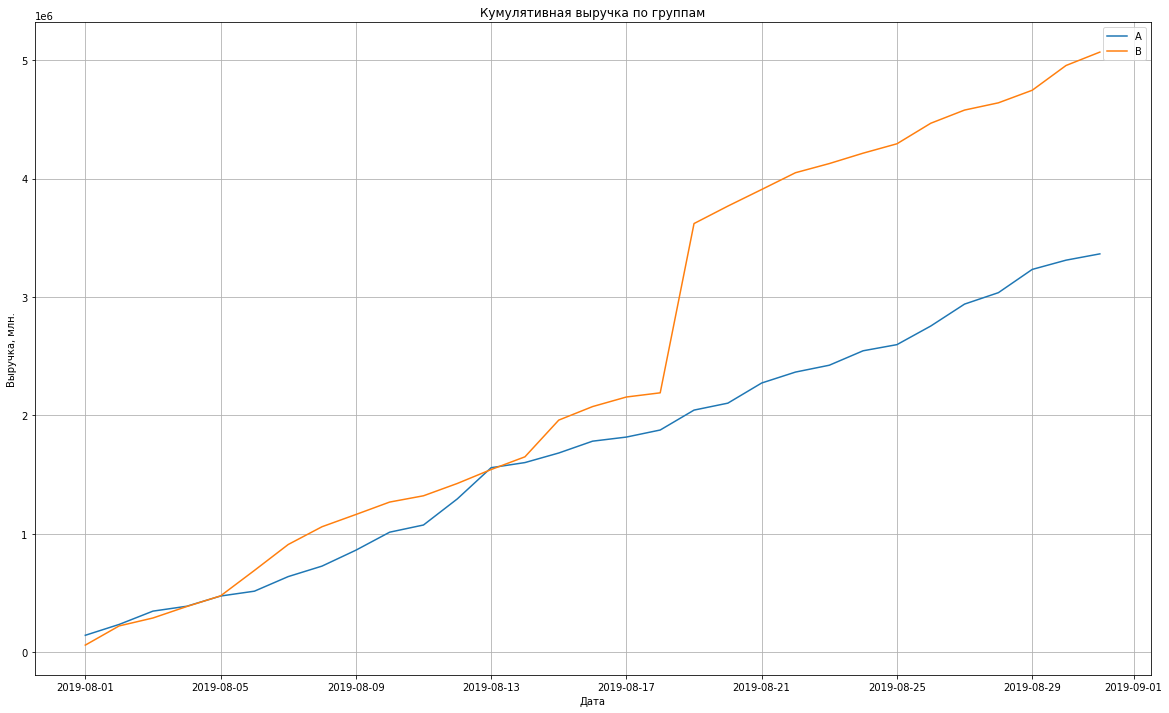

In [21]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Дата')
plt.ylabel('Выручка, млн.')
plt.title('Кумулятивная выручка по группам')
plt.grid(True)

# создаём датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# создаём датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.show()

В целом выручка в обеих группах растёт линейно за исключением скачка выручки группы B 18 августа. Необходимо больше данных для понимания этого вплеска.

### Построим график кумулятивного среднего чека по группам

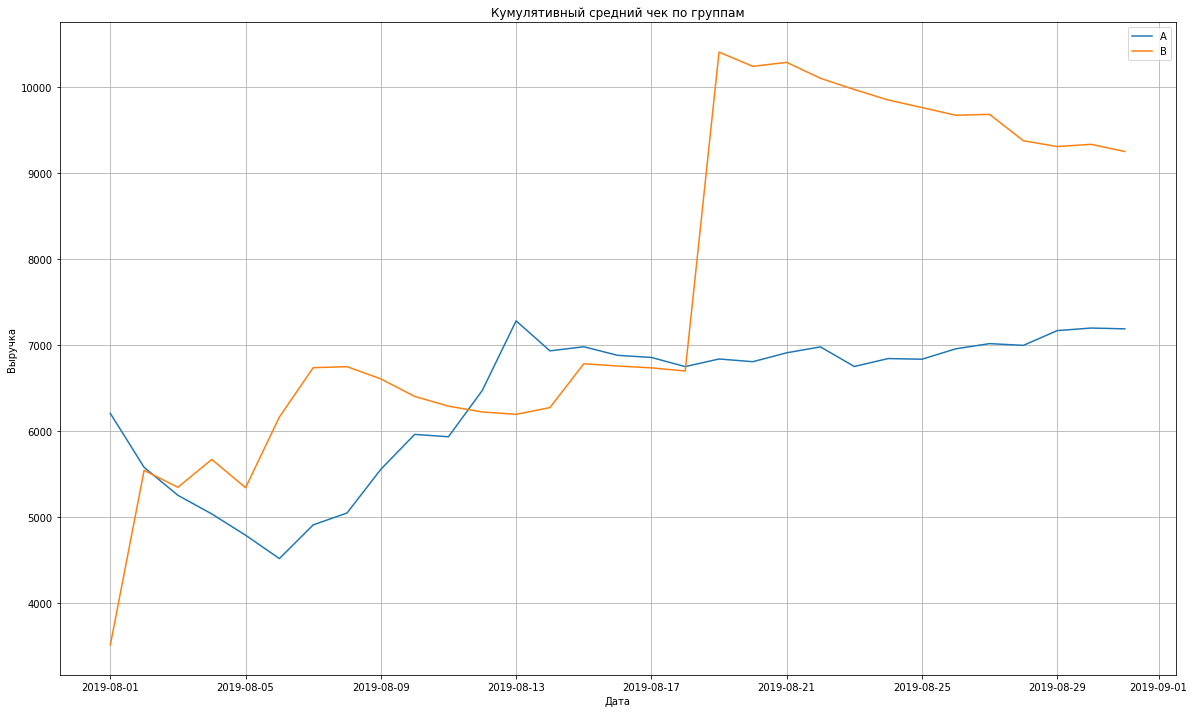

In [22]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивный средний чек по группам')
plt.grid(True)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.show()

Здесь уже не всё так однозначно. С самого начала средний чек сильно колеблется, но примерно после 18 августа выходит на "плато" в обеих группах. В группе A идёт слегка на повышение, а в группе B на понижение. Опять видим вплеск 18 августа в группе B. Скорее всего речь идёт про большой заказ (по сумме) и из-за этого вплеск и на графике по выручке. Далее "реальный" средний чек опускает общее среднее значение

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

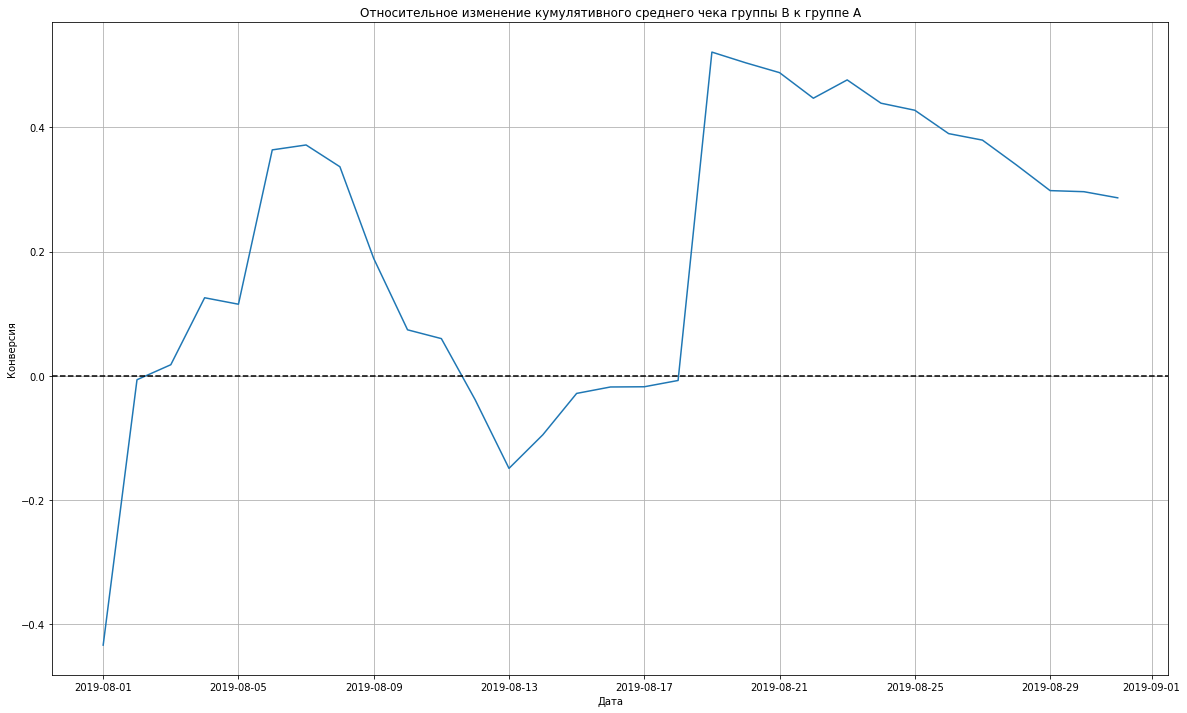

In [23]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.grid(True)

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Этот же вплеск 18 августа. Позже "реальный" средний чек делает более приземлённей средние значения

### Построим график кумулятивного среднего количества заказов на посетителя по группам

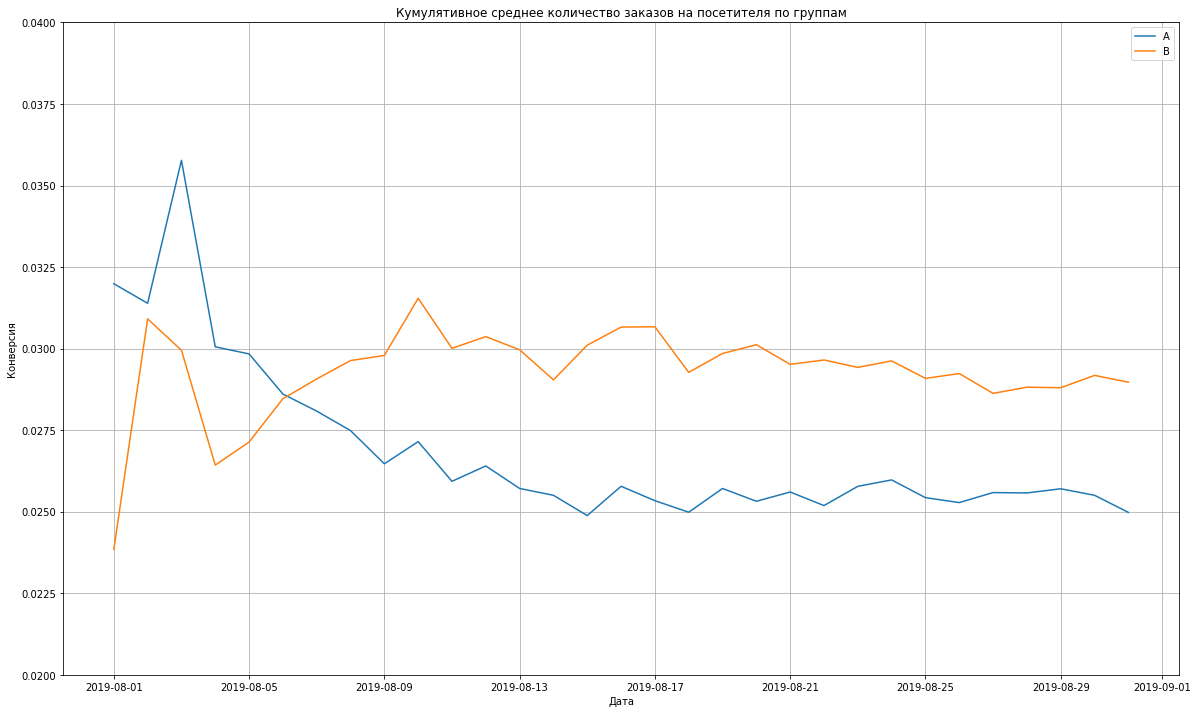

In [24]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.grid(True)
plt.ylim(0.02, 0.04)

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.show()

Первые дней 6 группы колебались вокруг среднего значения, но позже разошлись и зафиксировались. Группа B в лидерах

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

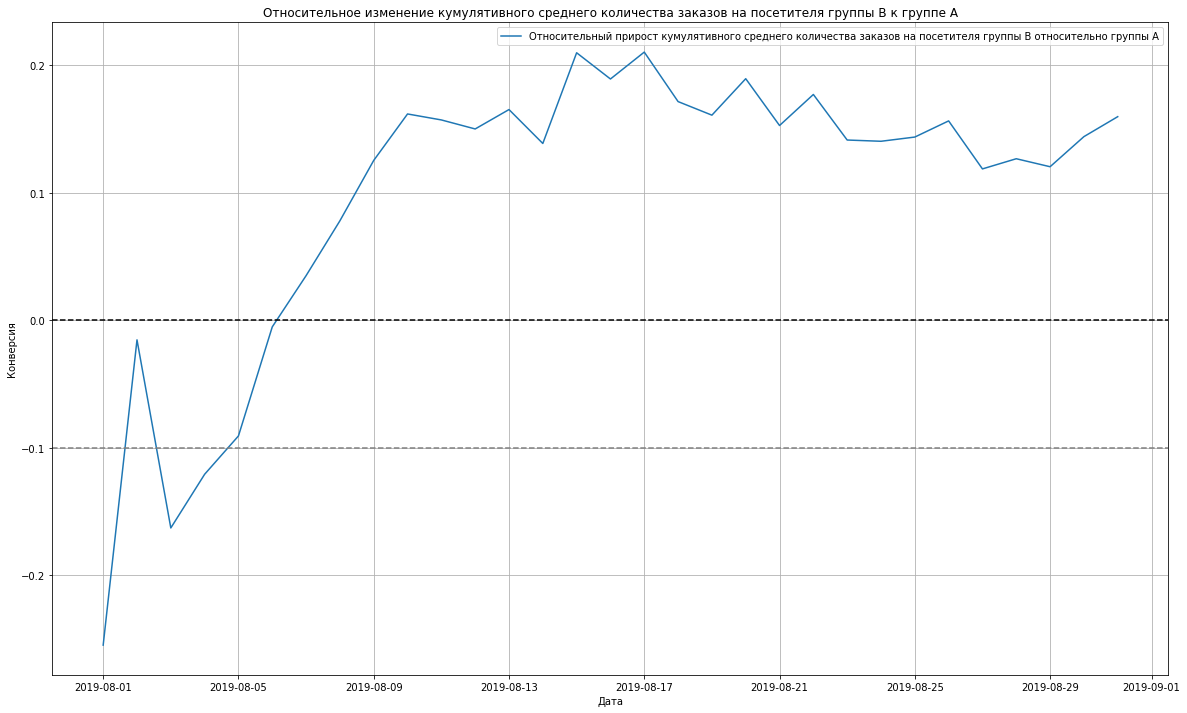

In [25]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.grid(True)

# 
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date',
                                                                           right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.legend()
plt.show()

Почти с самого начала группа B показывает лучше результат в отличии от группы A. В середине месяца конверсия около 20%, но к концу зафиксировалась в диапазоне 10-15%

### Построим точечный график количества заказов по пользователям

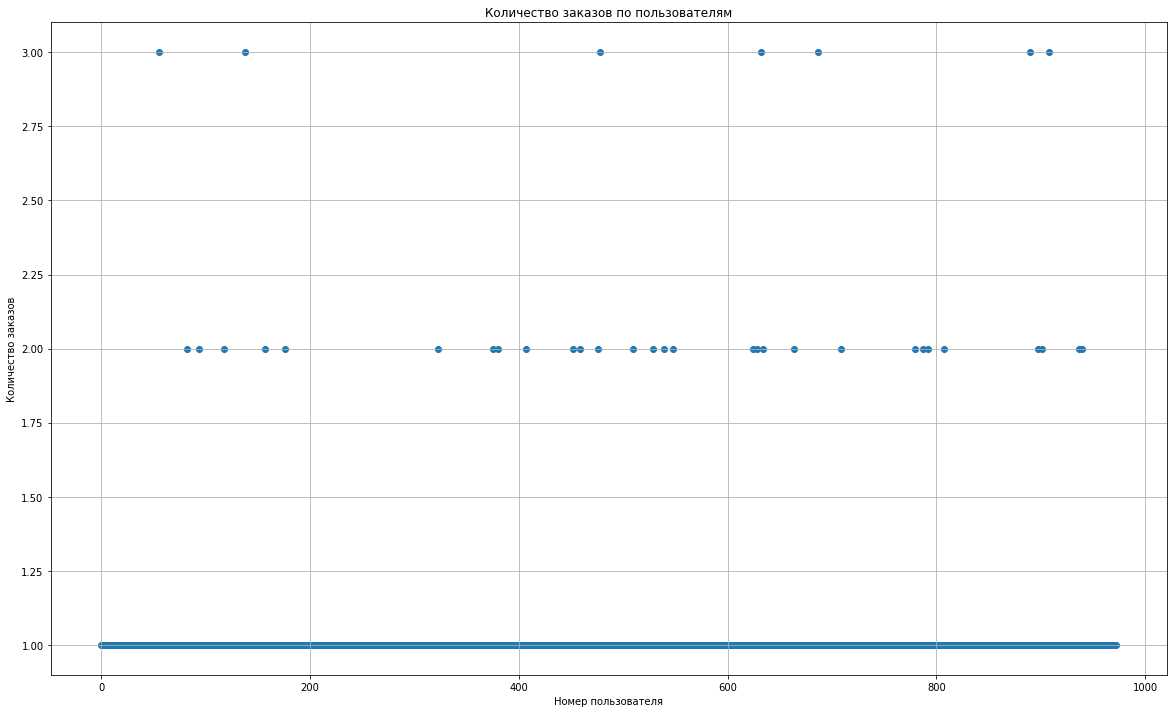

In [26]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.grid(True)

# создадим датафрейм с количеством заказов по пользователям
ordersByUsers = orders.groupby(['visitor_id', 'group'], as_index=False).agg({'transaction_id': 'nunique'})
ordersByUsers.columns = ['visitor_id','group','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

# построим точечную диаграмму
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Большинство пользователей заказывало только 1 раз, но пользователей кто заказывал 2 раза тоже много. Далее с увеличением количества заказов уменьшается количество точек на графике.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
# считаем 95й и 99й перцентиль количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Получается, что не более 5% пользователей оформляло больше 1 заказов и не более 1% пользователей оформляло больше 2 заказов

Возьмём 2 заказа за нижнюю границу, а большее количество заказов за аномалии

### Построим точечный график стоимостей заказов

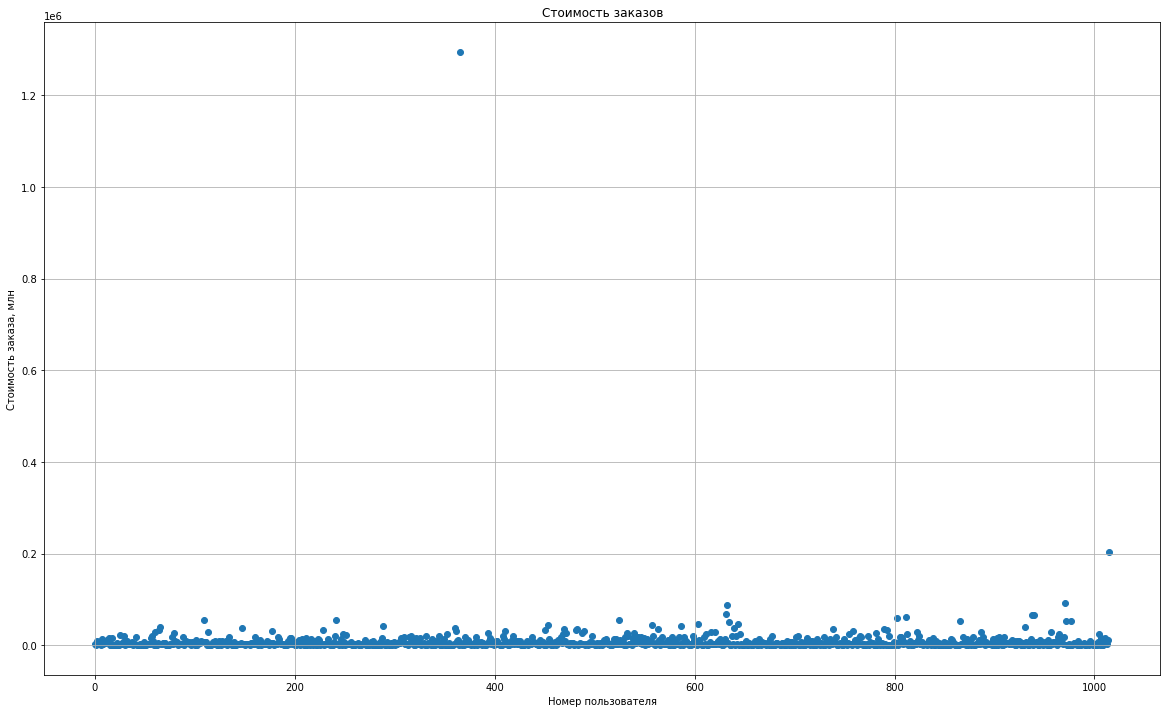

In [28]:
# настраиваем подписи осей, наименование графика и его размер
plt.figure(figsize=(20, 12))
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа, млн')
plt.title('Стоимость заказов')
plt.grid(True)

# построим точечную диаграмму
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.show()

Тут всё понятно, почти все заказы не доходят даже до 25000 рублей, но есть по одному заказу равным в 200000 и даже в 1250000

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [29]:
# считаем 95й и 99й перцентиль стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Получается, что не более 5% пользователей оформили заказ на сумму 26785 рублей и не более 1% пользователей на сумму более 53904 рубля.

Разумно выбрать сумму заказа 53904 рубля за нижнюю границу, а всё что более принять за аномалии

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [30]:
# создадим переменные в которых пользователи заказывали хотя бы раз
ordersA = orders.query('group == "A"').reset_index(drop=True)
ordersB = orders.query('group == "B"').reset_index(drop=True)
ordersByUsersA = ordersByUsers.query('group == "A"').reset_index(drop=True)
ordersByUsersB = ordersByUsers.query('group == "B"').reset_index(drop=True)

# посчитаем статистическую значимость по "сырым" данным
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

aplha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print("p-value: {0:.3f}".format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет"')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет"')

print("Относительный прирост конверсии группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.010
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет"
Относительный прирост конверсии группы B: 0.166


P-value значительно меньше 0.05, поэтому H0 отвергаем. Относительный прирост конверсии равен 14,4%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [31]:
#
alpha = 0.05
results = stats.mannwhitneyu(ordersA['revenue'], ordersB['revenue'])
print('p-value: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(ordersB['revenue'].mean()/ordersA['revenue'].mean()-1))

p-value: 0.829
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: 0.287


P-value значительно больше 0.05, поэтому не получилось отвергнуть H0. Наблюдаемое различие в 28,7% не является статистически значимым.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [32]:
# сделаем срезы данных с числом заказов равным 2 и суммой заказа не более 53904 рубля
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [33]:
# посчитаем статистическую значимость по "отфильтрорванным" данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeDataB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-value: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".')

print("Относительный прирост конверсии группы B: {0:.3f}"
      .format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p-value: 0.006
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в конверсии между группами нет".
Относительный прирост конверсии группы B: 0.195


P-value значительно меньше 0.05, поэтому H0 отвергаем. Относительный прирост конверсии равен 15,9%. Как и в случае с "сырыми" данными особо разницы нет

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [34]:
#
results = stats.mannwhitneyu(ordersA[np.logical_not(ordersA['visitor_id'].isin(abnormalUsers))]['revenue'],
                             ordersB[np.logical_not(ordersB['visitor_id'].isin(abnormalUsers))]['revenue'])
print('p-value: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".')

print("Относительный прирост в среднем чеке группы B: {0:.3f}"
      .format(ordersB[np.logical_not(ordersB['visitor_id'].isin(abnormalUsers))]['revenue'].mean()
              / ordersA[np.logical_not(ordersA['visitor_id'].isin(abnormalUsers))]['revenue'].mean() - 1))

p-value: 0.788
Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем чеке между группами нет".
Относительный прирост в среднем чеке группы B: -0.032


P-value значительно больше 0.05, поэтому не получилось отвергнуть H0. Относительный прирост в среднем чеке группы B = -0.032.

### Принятие решения по результатам теста

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным и по очищенным нет статистически значимого различия по среднему чеку между группами.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека колеблется, хотя к концу периода наблюдения тоже показывает, что результаты группы B становятся лучше группы A. Но глядя на данные очищенные от аномальных пользователей мы видим, что средний чек практически не изменился и даже стал немного меньше по отношению к группе A.

## Вывод:

Исходя из всех данных тест следует остановить и считать его успешным и переходить к следующей гипотезе